In [36]:
#Import modules

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


In [37]:
#Import data from CSV
combined_path = "output/true_combined.csv"
medicare_path = "Resources/Medicare_Enrollment_2017.csv"

In [38]:
#Import csvs
combined_df = pd.read_csv(combined_path)
medicare_df= pd.read_csv(medicare_path)

In [39]:
#Combine combined_df and medicare_df
combined_med_df=pd.DataFrame.merge(combined_df,medicare_df, on = ["State","County"])
combined_med_df

,State,County,POP2010,OHU2010,PovertyRate,MedianFamilyIncome,LAPOP1_10,LAPOP05_10,LAPOP1_20,LALOWI1_10,...,Food Environment Index,# Deaths,Years of Potential Life Lost Rate,% Obese,% Fair/Poor,# Diabetics,# Violent Crimes,# Unemployed,% Children in Poverty,Original Medicare
0,Alabama,Autauga,54571,20221,13.858333,61082.916667,18092.661348,30141.638549,11064.872922,6835.642497,...,6.9,830.0,9158.0,34,18,711.0,145.0,1327.0,19.0,5784
1,Alabama,Baldwin,182265,73180,14.358065,60664.935484,46400.350641,72307.849152,43486.806226,15459.848416,...,7.5,2573.0,7394.0,27,16,2615.0,415.0,4791.0,20.0,28388
2,Alabama,Barbour,27457,9820,24.533333,43123.000000,6683.975691,9302.717960,1182.176872,3251.362574,...,4.9,413.0,8573.0,44,25,525.0,85.0,771.0,45.0,4372
3,Alabama,Bibb,22915,7953,16.025000,43362.500000,295.614426,295.614426,0.000000,164.903295,...,7.3,407.0,11766.0,40,20,333.0,33.0,561.0,29.0,2480
4,Alabama,Blount,57322,21578,17.911111,52136.000000,5855.939161,7387.084978,3900.420369,2570.900481,...,8.3,906.0,9333.0,35,19,705.0,123.0,1316.0,22.0,6070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3089,Wyoming,Sweetwater,43806,16475,11.841667,81835.083333,9400.240856,16730.468695,8914.971285,1816.028671,...,8.1,445.0,6878.0,32,16,469.0,159.0,1053.0,10.0,5641
3090,Wyoming,Teton,21294,8973,8.100000,89555.250000,3711.377493,3949.327991,2605.093461,972.594547,...,8.0,116.0,3728.0,13,12,104.0,NaN,558.0,8.0,3122
3091,Wyoming,Uinta,21118,7668,14.166667,65312.666667,758.694309,758.694309,13.350968,318.523395,...,7.5,234.0,7660.0,28,15,243.0,8.0,475.0,12.0,2804
3092,Wyoming,Washakie,8533,3492,14.133333,62213.666667,1057.246483,2537.470166,885.406917,359.634002,...,8.0,97.0,7294.0,28,14,156.0,7.0,174.0,16.0,1812


In [42]:
#Convert "Original Medicare to String

combined_med_df[["Original Medicare"]]=combined_med_df[["Original Medicare"]].apply(pd.to_numeric)


In [45]:
#Read data from CSV
combined_df = pd.read_csv(combined_path)
combined_df

,State,County,POP2010,OHU2010,PovertyRate,MedianFamilyIncome,LAPOP1_10,LAPOP05_10,LAPOP1_20,LALOWI1_10,...,TractSNAP,Food Environment Index,# Deaths,Years of Potential Life Lost Rate,% Obese,% Fair/Poor,# Diabetics,# Violent Crimes,# Unemployed,% Children in Poverty
0,Alabama,Autauga,54571,20221,13.858333,61082.916667,18092.661348,30141.638549,11064.872922,6835.642497,...,2682,6.9,830.0,9158.0,34,18,711.0,145.0,1327.0,19.0
1,Alabama,Baldwin,182265,73180,14.358065,60664.935484,46400.350641,72307.849152,43486.806226,15459.848416,...,6471,7.5,2573.0,7394.0,27,16,2615.0,415.0,4791.0,20.0
2,Alabama,Barbour,27457,9820,24.533333,43123.000000,6683.975691,9302.717960,1182.176872,3251.362574,...,2097,4.9,413.0,8573.0,44,25,525.0,85.0,771.0,45.0
3,Alabama,Bibb,22915,7953,16.025000,43362.500000,295.614426,295.614426,0.000000,164.903295,...,1125,7.3,407.0,11766.0,40,20,333.0,33.0,561.0,29.0
4,Alabama,Blount,57322,21578,17.911111,52136.000000,5855.939161,7387.084978,3900.420369,2570.900481,...,2900,8.3,906.0,9333.0,35,19,705.0,123.0,1316.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3093,Wyoming,Sweetwater,43806,16475,11.841667,81835.083333,9400.240856,16730.468695,8914.971285,1816.028671,...,835,8.1,445.0,6878.0,32,16,469.0,159.0,1053.0,10.0
3094,Wyoming,Teton,21294,8973,8.100000,89555.250000,3711.377493,3949.327991,2605.093461,972.594547,...,128,8.0,116.0,3728.0,13,12,104.0,NaN,558.0,8.0
3095,Wyoming,Uinta,21118,7668,14.166667,65312.666667,758.694309,758.694309,13.350968,318.523395,...,621,7.5,234.0,7660.0,28,15,243.0,8.0,475.0,12.0
3096,Wyoming,Washakie,8533,3492,14.133333,62213.666667,1057.246483,2537.470166,885.406917,359.634002,...,337,8.0,97.0,7294.0,28,14,156.0,7.0,174.0,16.0


In [46]:
#FOOD ENVIRONMENT INDEX:

#Find the mean of the food environment index:
food_env_avg = combined_df["Food Environment Index"].mean()
print("The national Food Environment Index Average is: " + str(food_env_avg))

The national Food Environment Index Average is: 7.025338928340858


In [47]:
#Find the median of the food environment index:
food_env_med = combined_df["Food Environment Index"].median()
print("The national Food Environment Index Median is: " + str(food_env_med))

The national Food Environment Index Median is: 7.3


In [48]:
#FOOD ENVIRONMENT INDEX 

#Find the stats of the food environment index:
food_env_stats = combined_df["Food Environment Index"].describe()
food_env_stats

count    3098.000000
mean        7.025339
std         1.258195
min         0.000000
25%         6.400000
50%         7.300000
75%         7.900000
max        10.000000
Name: Food Environment Index, dtype: float64

In [49]:
#Calculate the 0.25 quantile. This is what will be used for the poor environment cutoff.
bottomquartile = combined_df["Food Environment Index"].quantile(q=0.25)
bottomquartile

6.4

In [51]:
#Group the food environments into "healthy" or "poor" environments based on the cutoff
healthy_env=combined_df.loc[combined_df["Food Environment Index"]>=bottomquartile]
poor_env=combined_df.loc[combined_df["Food Environment Index"]<bottomquartile]

In [63]:
#Creating bins based on max/min student budget values
bins = [0, 6.4, 10]
#bin names
ranges = ["Poor", "Healthy"]

In [64]:
#Slicing the data and placing into bins
pd.cut(combined_med_df["Food Environment Index"], bins, labels=ranges)

0       Healthy
1       Healthy
2          Poor
3       Healthy
4       Healthy
         ...   
3089    Healthy
3090    Healthy
3091    Healthy
3092    Healthy
3093    Healthy
Name: Food Environment Index, Length: 3094, dtype: category
Categories (2, object): [Poor < Healthy]

In [65]:
#Creating a column for food environment categories
combined_med_df["Environment Category"] = pd.cut(combined_med_df["Food Environment Index"], bins=bins, labels=ranges)
combined_med_df.reset_index(drop=True,inplace=True)

In [68]:
#Creating series for each parameter. Calculating the sum for Medicare enrollees and # of diabetics per category enrollment.
population_sum = combined_med_df.groupby("Environment Category")["Original Medicare"].sum()
diabetics_sum = combined_med_df.groupby("Environment Category")["# Diabetics"].sum()

In [74]:
#Create dataframe to hold data
popsum_byenv_df = pd.DataFrame(
    {"Medicare Population Total": population_sum,
    "Medicare Diabetic Total": diabetics_sum})

In [88]:
#Adding Percent Diabetic with Medicare
popsum_byenv_df["Percent Diabetic"]=(popsum_byenv_df["Medicare Diabetic Total"]/popsum_byenv_df["Medicare Population Total"])*100
percent_diabetic_df=popsum_byenv_df.reset_index()
percent_diabetic_df

,Environment Category,Medicare Population Total,Medicare Diabetic Total,Percent Diabetic
0,Poor,6314323,630891.0,9.991427
1,Healthy,31222101,2637842.0,8.448637


In [107]:
#Pie plot for Poor Food Environment

#Generate pie plot using pyplot
#Designating data to draw upon
labels = ["Diabetic","Non-Diabetic"]
sizes =  [630891,5683432]
colors = ["gold", "lightskyblue"]
explode = (0.1,0)

Text(0.5, 1.0, 'Percent of Medicare Enrollment Diabetic - Poor Food Environment')

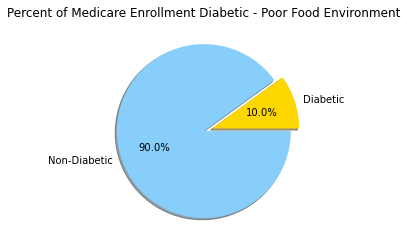

In [110]:
#Creating the pie chart based on the values above
plt.pie(sizes, explode = explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Percent of Medicare Enrollment Diabetic - Poor Food Environment")

In [119]:
#Pie plot for Healthy Food Environment

#Generate pie plot using pyplot
#Designating data to draw upon
labels = ["Diabetic","Non-Diabetic"]
sizes =  [2637842,28584259]
colors = ["slateblue", "thistle"]
explode = (0.1,0)

Text(0.5, 1.0, 'Percent of Medicare Enrollment Diabetic - Healthy Food Environment')

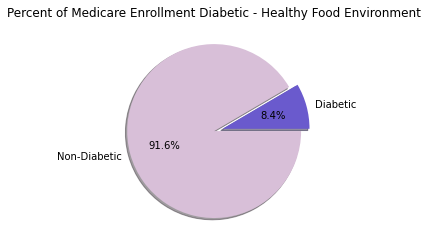

In [120]:
#Creating the pie chart based on the values above
plt.pie(sizes, explode = explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Percent of Medicare Enrollment Diabetic - Healthy Food Environment")